# Tatoeba translation scores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette("muted")

In [3]:
PLOTS_PATH = "./plots"

In [4]:
df = pd.read_csv("./data/translation_scores.txt", sep="\t")

df.sample(10)

,translation,cosine,bleu
100895,Том не мог ответить Мэри.,0.000000,100.000000
362285,Весна пришла в себя.,0.114637,10.682175
52881,"Ходят слухи, что вы двое встречаетесь.",0.051971,68.037493
15273,Семья Тома не очень большая.,0.009641,67.318214
375106,На этот раз ты зашел слишком далеко.,0.001141,50.000000
235704,"Я знаю город, жители которого никогда не курили.",0.000000,100.000000
390653,Том появился из ниоткуда.,0.016226,42.728701
84822,"К счастью, Том был в ремне безопасности.",0.125248,46.713798
420483,У Тома было настроение получше час назад.,0.095192,6.567275
203894,Мне очень нравится путешествовать по кораблю.,0.045025,15.619700


In [5]:
# Normalize bleu, since it is multiplied by 100.0
df.bleu = df.bleu / 100

In [6]:
df.describe()

,cosine,bleu
count,491482.000000,491482.000000
mean,0.043265,0.492338
std,0.072209,0.331849
min,0.000000,0.004618
25%,0.000287,0.206124
50%,0.012435,0.379918
75%,0.056258,0.809107
max,1.332027,1.000000


In [7]:
from datetime import date
import os

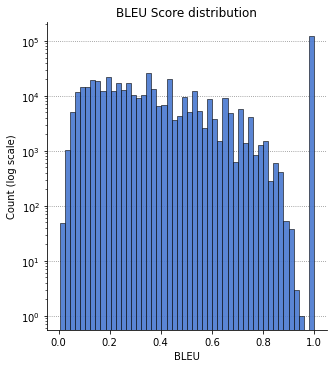

In [67]:
sns.displot(data=df, x="bleu", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="BLEU Score distribution",
    xlabel="BLEU",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"bleu_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

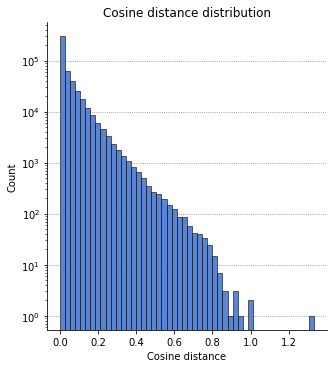

In [69]:
sns.displot(data=df, x="cosine", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Cosine distance distribution",
    xlabel="Cosine distance",
    ylabel="Count",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"cosine_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

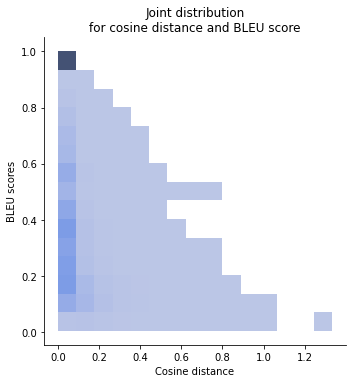

In [93]:
sns.displot(data=df, x="cosine", y="bleu", bins=15)

ax = plt.gca()
ax.set(
    title="Joint distribution\nfor cosine distance and BLEU score",
    xlabel="Cosine distance",
    ylabel="BLEU scores",
)

plt.savefig(
    os.path.join(PLOTS_PATH, f"joint_distr_cosine_bleu_15_bins_{date.today()}.pdf"),
    bbox_inches="tight"
)

In [94]:
print("Корреляция между оценками качества перевода")

df.corr()

Корреляция между оценками качества перевода


,cosine,bleu
cosine,1.000000,-0.475757
bleu,-0.475757,1.000000


## Separating data into bad translations and good translations

In [96]:
# Zone of idiomes
cut_df = df[df.cosine > 0.8]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 33


,translation,cosine,bleu
68962,"Предвидимая опасность — это опасность, которой...",0.807362,0.049900
426306,Многие хрени делают из хлама.,0.832403,0.081167
98951,У маленьких горшков длинные ручки.,0.806493,0.081167
133332,Многие делают щекотку.,0.926431,0.058764
47231,Дождь идет кошкам и собакам.,0.821410,0.081167
300389,Естественно.,0.823215,0.151633
262133,Это кусок торта.,0.832333,0.159736
423224,Поговорите о дьяволе и он обязательно появится.,0.956265,0.055224
328865,Цепочка не срабатывает на самом слабом звене.,0.806969,0.055224
241218,Вааааааааааааааааааааааааааааааааааааааааааааа...,1.332027,0.067668


In [97]:
# Great translations by both metrics
cut_df = df[(df.cosine < 0.1) & (df.bleu > 0.9)]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 121244


,translation,cosine,bleu
58741,Это все?,0.0,1.0
199553,Я оставил им пару сообщений.,0.0,1.0
41384,Чем я могу ему помочь?,0.0,1.0
325601,Ты любишь слонов.,0.0,1.0
96935,"Мэри сказала мне, что хочет поговорить.",0.0,1.0
454040,Я тоже жил в Гамбурге.,0.0,1.0
122033,Я из Дании.,0.0,1.0
486247,Пора вернуться к реальности.,0.0,1.0
118413,Мы с Томом давно женаты.,0.0,1.0
100606,У него новая девушка.,0.0,1.0
